# Project-2: Sparse Representations

## Review of Relevant concepts

We want to be able to solve the following problem which we denote by $P_{0}$:

$\left(P_{0}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{0}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

where we assume that $\mathbf{b} \in \mathbb{R}^{n}, \mathbf{A} \in \mathbb{R}^{n \times m} \text{ and } \mathbf{x} \in \mathbb{R}^{m}$ with $n << m$. So, $\mathbf{x}$ is considered to be a *tall* vector with many of the entries possibly zero. Our objective therefore is to find $\mathbf{x}$ which consists of two effective parts to be found:

- The **support** of $\mathbf{x}$ defined as $\mathcal{S}_x = \lbrace i: x_i \neq 0 \rbrace $,
- The elements of $\mathbf{x}$ over $\mathcal{S}_x$, which we can refer to as $\mathbf{x}_{\mathcal{S}_x}$. 

Also, recall that the $\ell_0$ norm is equal to the cardinality of such a support set $\mathcal{S}_x$.

### Relation between $\ell_{0}$ and $\text{spark}$

**Spark**: The spark of a matrix is the **smallest** number of **linearly dependent** columns

$\text{spark}\left(\mathbf{A}\right) = \text{min}_{\mathbf{x} \in \mathbb{R}^m} \Vert \mathbf{x} \Vert_{0}$ s.t. $\mathbf{A}\mathbf{x} = \boldsymbol{0}, \mathbf{x} \neq \boldsymbol{0}$

- The non-zero vectors in the null space of $\mathbf{A}$ satisfy: $\Vert \mathbf{x} \Vert_{0} \geq \text{spark}\left(\mathbf{A}\right)$

- For $\mathbf{A}\mathbf{x} = \mathbf{b}$, the **sparsest** solution necessarily satisfies the relation $\Vert \mathbf{x} \Vert_{0} < \frac{1}{2}\text{spark}\left(\mathbf{A}\right)$

- $2 \leq \text{spark}\left(\mathbf{A}\right) \leq n + 1$

But finding spark of a matrix is combinatorial problem. So, we choose to solve the $\ell_{0}$ problem via Greedy algorithms or smoothing penalty algorithms

## Orthogonal Matching Pursuit (OMP)

OMP is a greedy solution to the support-finding problem. We are assumed to be given as inputs: $\mathbf{A}$, $\mathbf{b}$ and $k_0$ (sparsity level of $\mathbf{x}$). This consists of the following parts:

1. Initialization
    - Set $k=0$ (iteration counter)
    - Set initial support set $\mathcal{S}_x^{(0)} = \phi$
    - Set initial residual to be $\mathbf{r}^{(0)} = \mathbf{b}$
    - Set error threshold $\varepsilon$

2. Repeat until either $\Vert\mathbf{r}^{(k)} \Vert_2 < \varepsilon$ or max no. of iterations is completed or $\Vert\mathbf{r}^{(k)} \Vert_2 > \Vert\mathbf{r}^{(k-1)} \Vert_2$

    - Sweep stage: Compute errors $\epsilon(j) = \min_{z_j} \Vert \mathbf{a}_jz_j - \mathbf{r}^{(k-1)}\Vert_2^2$ (find the optimal choice) and then finding $i_{k}^{\star} = \text{argmin}_{j} \epsilon(j)$. This can be also done in one single step.
    
    - Update support $\mathcal{S}_x^{(k)} = \mathcal{S}_x^{(k-1)} \cup i_k^{\star}$
    - Update residual $\mathbf{r}^{(k)} = \mathbf{b} - \mathbf{A}_{\mathcal{S}_x^{(k)}}\mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$
    - Update counter $k = k + 1$

3. Finally get $\hat{x} \in \mathbb{R}^N$ with $\hat{\mathbf{x}}_{\mathcal{S}_x^{(k)}} = \mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$ and remaining part as zeros.

## Subspace Pursuit (SP)

SP is another greedy solution. We are assumed to be given as inputs: $\mathbf{A}$, $\mathbf{b}$ and $k_0$ (sparsity level of $\mathbf{x}$). This consists of the following parts:

1. Initialization
    - Set $k=0$ (iteration counter)
    - Set initial support set $\mathcal{S}_x^{(0)} = \phi$
    - Set initial residual to be $\mathbf{r}^{(0)} = \mathbf{b} - \mathbf{A}_{\mathcal{S}_x^{(0)}}\mathbf{A}_{\mathcal{S}_x^{(0)}}^{\dagger}\mathbf{b}$
    - Set error threshold $\varepsilon$

2. Repeat until either $\Vert\mathbf{r}^{(k)} \Vert_2 < \varepsilon$ or max no. of iterations is completed or $\Vert\mathbf{r}^{(k)} \Vert_2 > \Vert\mathbf{r}^{(k-1)} \Vert_2$:

    - Find $k_0$ highest amplitudes of $\mathbf{A}^{\top}\mathbf{r}_{k-1}$ and set it as $\mathcal{S}_p$ 
    - Update support $\mathcal{S}_u = \mathcal{S}_x^{(k-1)} \cup \mathcal{S}_p$
    - Compute an orthgonal projection $\hat{\mathbf{x}}_{\mathcal{S}_u} = \mathbf{A}_{\mathcal{S}_u}^{\dagger}\mathbf{b}$ and assign remaining parts of the vector as 0.
    - Find $k_0$ highest amplitudes of $\hat{\mathbf{x}}$ and set it as $\mathcal{S}_x^{(k)}$
    - Update residual $\mathbf{r}^{(k)} = \mathbf{b} - \mathbf{A}_{\mathcal{S}_x^{(k)}}\mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$
    - Update counter $k = k + 1$

3. Finally get $\hat{x} \in \mathbb{R}^N$ with $\hat{\mathbf{x}}_{\mathcal{S}_x^{(k)}} = \mathbf{A}_{\mathcal{S}_x^{(k)}}^{\dagger}\mathbf{b}$ and remaining part as zeros.

## Basis pursuit (BP)

Basis pursuit is a smoothing penalty approach to solving the $\ell_{0}$ problem. It involves using $\ell_1$ norm minimization. We wish to solve the following problem:

$\left(P_{1}\right): \mathbf{x}^{\star} = \text{argmin}_{\mathbf{x}} \Vert \mathbf{x} \Vert_{1}$ s.t. $\mathbf{b} = \mathbf{A}\mathbf{x}$

In the lecture, you have seen that this is a convex problem and can be implemented using linear programming (some pseduocode also given in the lecture slides). 

# Tasks

In this project, your task is to recover the sparse vector $\mathbf{x} \in \mathbb{R}^{m}$ with sparsity level $k \triangleq \Vert \mathbf{x} \Vert_0 << m$. Typically this sparsity level is somewhere between $5-10\%$. For the observation model, generate a random matrix instance $\mathbf{A} \in \mathbb{R}^{n \times m}$ and create an observation vector $\mathbf{b} = \mathbf{A}\mathbf{x}$. Then, try to reconstruct $\mathbf{x}$ from the observations $\mathbf{b}$ using:

1. Implement orthogonal matching pursuit (OMP) algorithm for reconstruction of $\mathbf{x}$ from the observations $\mathbf{b}$. 
2. Implement basis pursuit (BP) algorithm for reconstruction of $\mathbf{x}$ from the observations $\mathbf{b}$. 
3. For each case, try to show the phase transition in your results. **Phase transition** refers to a sudden change in the reconstruction quality from bad reconstruction quality to very good reconstruction quality, when the number of obervations $n$ is increased. You can try to plot a quality measure such as normalized mean squared error in dB scale vs. the ratio $\frac{n}{m}$, where $n$ represents the dimension of the observation vector and $m$ represents the dimension of the input vector $\mathbf{x}$. 
4. Compare the algorithms in terms of phase transitions. 
5. *Optional task: Also implement another greedy algorithm (psuedocode available in lecture slides) known as subspace pursuit (SP). Analyse the phase transition.*

Some code segments and function signatures are provided. You should fill in the functions. Perform all (or as many as you can) of the tasks in this project assignment. You are going to present your work to the course responsible or one of the teaching assistants (TA) and it pays off to have a clear, well structured and brief notebook. Include an algorithmic solution and/or numerical result and/or graphs wherever asked to illustrate your results. Your code should be functioning and easy to read.

## Libraries

You should use Python for implementation. The algorithms OMP, BP should be implemented without using dedicated library functions from `scikit-learn`. You can use: `numpy`, `scipy`, `matplotlib`, `cvxopt`/`cvxpy`. 

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data for testing the OMP algorithm

We seek to generate $\mathbf{x} \in \mathbb{R}^m$ having sparsity level $k_0 \triangleq \Vert \mathbf{x} \Vert_0 << m$. 

In [2]:
# Generate a vector x having sparsity levekl k_0 
def create_sparse_x(m, k0):        
    x = np.zeros((m, 1))
    x[np.random.choice(m,k0,replace=False), :] = np.random.randn(k0,1)
    return x

# Generate the observation matrix as a random matrix instance
def initialise_random_matrix(M, N):
    return np.random.uniform(low = -1, high = 1, size = (M,N))

# Generate the observation vector b
def create_observation_vector(A, x):
    return np.dot(A, x)

In [3]:
# Compute the Normalized mean squared error (NMSE) between the original x and reconstruction x_hat using OMP
def compute_NMSE(x, x_hat):

    nmse = np.mean(np.square(np.linalg.norm(x_hat - x, ord=2, axis=0))) / np.mean(np.square(np.linalg.norm(x, ord=2)))
    nmse_log10 = 10*np.log10(nmse)
    return nmse_log10

# Compute Average Support cardinality error (ASCE)
def compute_ASCE(Sx_orig, Sx_hat):
    return  1 - (len(np.intersect1d(np.unique(Sx_hat), Sx_orig)) / len(Sx_orig))

In [4]:
Sx_orig = np.array([1, 2, 4, 5])
Sx_hat = np.array([2, 6, 7])
compute_ASCE(Sx_orig, Sx_hat)

0.75

In [5]:
# Construct the reconstruction
def construct_x_hat(x_hat_Sx, S_x_hat, A):
    x_hat = np.zeros((A.shape[1], 1))
    x_hat[np.array(S_x_hat), :] = x_hat_Sx
    return x_hat

## Implementing the Orthogonal Matching Pursuit algorithm

In [6]:
def run_OMP(A, b, k0, tol=1e-4, maxiter=100):
    
    # Initialization step of OMP
    x_hat = np.zeros((A.shape[1], 1)) # Initialize the solution x
    r_k = np.copy(b) # Initialize the residual vector
    S_x_hat = [] # Initialize the support set
    
    for k in range(maxiter):
        
        # Sweep stage
        r_k_prev = np.copy(r_k)
        i_k = np.argmax(np.abs(np.dot(A.T,r_k_prev)))
        # Add i_k to the Support set
        S_x_hat.append(i_k)
        # Compute the residual
        A_S_x = A[:,np.array(S_x_hat)]
        r_k = b - np.dot(A[:,np.array(S_x_hat)] ,np.dot(np.linalg.pinv(A[:,np.array(S_x_hat)]), b))
        
        if np.linalg.norm(r_k) < tol: #or np.linalg.norm(r_k) > np.linalg.norm(r_k_prev):
            print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            print("Algorithm converged!")
            break
        else:
            continue
            #print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
    
    # Compute the final solution
    x_hat = np.dot(np.linalg.pinv(A[:,np.array(S_x_hat)]), b)
    print("Obtained final support: {}".format(np.array(S_x_hat)))
    print("Obtained final unique support: {}".format(np.unique(np.array(S_x_hat))))
    
    return x_hat, S_x_hat

## Implementing the Matching Pursuit Algorithm

In [7]:
def run_MP(A, b, k0, tol=1e-4, maxiter=100):
    
    # Initialization step of OMP
    x_hat = np.zeros((A.shape[1], 1)) # Initialize the solution x
    r_k = np.copy(b) # Initialize the residual vector
    S_x_hat = [] # Initialize the support set
    
    for k in range(maxiter):
        
        # Sweep stage
        r_k_prev = np.copy(r_k)
        i_k = np.argmax(np.abs(np.dot(A.T,r_k_prev)))
        # Add i_k to the Support set
        S_x_hat.append(i_k)
        # Compute the provisional solution
        x_hat[i_k] += np.dot(A[:,i_k].T,r_k_prev)
        # Update the residual
        r_k = r_k_prev - A[:,i_k].reshape((-1,1))*np.dot(A[:,i_k].T,r_k_prev)
        
        if np.linalg.norm(r_k) < tol:# or np.linalg.norm(r_k) > np.linalg.norm(r_k_prev):
            print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            print("Algorithm converged!")
            break
        else:
            continue
            #print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
    
    # Compute the final solution
    #x_hat = np.dot(np.linalg.pinv(A[:,np.unique(np.array(S_x_hat))]), b)
    print("Obtained final support: {}".format(np.array(S_x_hat)))
    print("Obtained final unique support: {}".format(np.unique(np.array(S_x_hat))))
    
    return x_hat, S_x_hat

## Implementing the Subspace Pursuit Algorithm

In [8]:
def run_SP(A, b, k0, tol=1e-4, maxiter=3000):
    
    # Initialization step of OMP
    x_hat = np.zeros((A.shape[1], 1)) # Initialize the solution x
    S_x_k = np.argsort(np.abs(np.dot(A.T,b)), axis=0)[::-1][:k0].reshape(-1,).tolist()
    r_k = b - np.dot(A[:,np.array(S_x_k)] ,np.dot(np.linalg.pinv(A[:,np.array(S_x_k)]),b)) 
    
    for k in range(maxiter):
        
        # Sweep stage
        r_k_prev = np.copy(r_k)
        S_x_p = np.argsort(np.abs(np.dot(A.T,r_k_prev)), axis=0)[::-1][:k0].reshape(-1,).tolist()
        S_x_u = S_x_p + S_x_k  # Add S_x_hat to the Support set
        x_hat_ = np.dot(np.linalg.pinv(A[:,np.array(S_x_u)]), b) # Compute the residual
        x_hat_u = construct_x_hat(x_hat_, S_x_u, A) # Compute reconstruction error
        S_x_k = np.argsort(np.abs(x_hat_u), axis=0)[::-1][:k0].reshape(-1,).tolist() 
        r_k = b - np.dot(A[:,np.array(S_x_k)] ,np.dot(np.linalg.pinv(A[:,np.array(S_x_k)]),b))
        
        if np.linalg.norm(r_k) < tol:# or np.linalg.norm(r_k) > np.linalg.norm(r_k_prev) or k > k0:
            print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            print("Algorithm converged!")
            break
        else:
            #print("Iteration: {}, residual for iteration {}: {}, tolerance: {}".format(k+1,k,np.linalg.norm(r_k),tol))
            continue
            
    # Compute the final solution
    x_hat = np.dot(np.linalg.pinv(A[:,np.array(S_x_k)]), b)
    print("Obtained final support: {}".format(np.array(S_x_k)))
    print("Obtained final unique support: {}".format(np.unique(np.array(S_x_k))))
    
    return x_hat, S_x_k

## Plotting the NMSE vs $\frac{n}{m}$ for OMP and SP

We expect to see a **phase transition**, i.e. a sudden jump in the reconstruction quality from very bad reconstruction to a very good reconstruction quality when the number of observations $n$ is increased keeping $m$ fixed.

In [9]:
m = 50 # This is the length of the vector m
k0 = int(0.10 * m) # Usually the sparsity level is 5-10 % the value of m
x = create_sparse_x(m, k0)

In [10]:
Sx_orig = np.argwhere(x != 0)[:,0] # Original support

In [11]:
h = np.random.choice(m,size=(k0,),replace=True)
h

array([39,  5, 37, 15, 13])

In [12]:
Sx_orig

array([27, 36, 39, 44, 46])

In [13]:
len(np.setdiff1d(np.unique(h), Sx_orig))/len(Sx_orig)

0.8

In [14]:
N = 1 # No. of random trials
m = 1000 # This is the length of the vector m
k0 = int(0.05 * m) # Usually the sparsity level is 5-10 % the value of m
n_arr = np.arange(1,m,10)

for i in range(N):
    
    x = create_sparse_x(m, k0)
    Sx_orig = np.argwhere(x != 0)[:,0] # Original support
    
    nmse_arr_OMP = np.zeros((N,len(n_arr))) #[]
    nmse_arr_MP = np.zeros((N,len(n_arr))) #[]
    nmse_arr_SP = np.zeros((N,len(n_arr))) #[]
    asce_arr_OMP = np.zeros((N,len(n_arr))) #[]
    asce_arr_MP = np.zeros((N,len(n_arr))) #[]
    asce_arr_SP = np.zeros((N,len(n_arr))) #[]

    for j, ni in enumerate(n_arr): # ni represents the dimension of the observation vector

        A = initialise_random_matrix(ni, m)
        A = A / np.repeat(np.linalg.norm(A,axis=0).reshape((1,-1)),ni,axis=0)
        b = create_observation_vector(A, x)

        print("Running OMP")
        x_hat_Sx_OMP, S_x_hat_OMP = run_OMP(A, b, k0, tol=1e-10, maxiter=100)
        x_hat_OMP = construct_x_hat(x_hat_Sx_OMP, S_x_hat_OMP, A)
        nmse_OMP = compute_NMSE(x=x, x_hat=x_hat_OMP)
        asce_OMP = compute_ASCE(Sx_orig=Sx_orig, Sx_hat=S_x_hat_OMP)
        nmse_arr_OMP[i,j] = nmse_OMP
        asce_arr_OMP[i,j] = asce_OMP
        #nmse_arr_OMP.append(nmse_OMP)
        #asce_arr_OMP.append(asce_OMP)

        print("Running MP")
        x_hat_Sx_MP, S_x_hat_MP = run_MP(A, b, k0, tol=1e-10, maxiter=100)
        x_hat_MP = x_hat_Sx_MP
        nmse_MP = compute_NMSE(x=x, x_hat=x_hat_MP)
        asce_MP = compute_ASCE(Sx_orig=Sx_orig, Sx_hat=S_x_hat_MP)
        nmse_arr_MP[i,j] = nmse_MP
        asce_arr_MP[i,j] = asce_MP
        
        #nmse_arr_MP.append(nmse_MP)
        #asce_arr_MP.append(asce_MP)

        print("Running SP")
        x_hat_Sx_SP, S_x_hat_SP = run_SP(A, b, k0, tol=1e-10, maxiter=100)
        x_hat_SP = construct_x_hat(x_hat_Sx_SP, S_x_hat_SP, A)
        nmse_SP = compute_NMSE(x=x, x_hat=x_hat_SP)
        asce_SP = compute_ASCE(Sx_orig=Sx_orig, Sx_hat=S_x_hat_SP)
        nmse_arr_SP[i,j] = nmse_SP
        asce_arr_SP[i,j] = asce_SP
        
        #asce_arr_SP.append(asce_SP)
        #nmse_arr_SP.append(nmse_SP)
        #n_arr.append(ni/m)

        print("n: {}, m: {}, nmse for OMP: {}, nmse for MP: {}, nmse for SP: {}".format(ni, m, nmse_OMP, nmse_MP, nmse_SP))
        print("n: {}, m: {}, asce for OMP: {}, asce for MP: {}, asce for SP: {}".format(ni, m, asce_OMP, asce_MP, asce_SP))
        print("-"*100)
    
    

Running OMP
Iteration: 1, residual for iteration 0: 0.0, tolerance: 1e-10
Algorithm converged!
Obtained final support: [0]
Obtained final unique support: [0]
Running MP
Iteration: 1, residual for iteration 0: 0.0, tolerance: 1e-10
Algorithm converged!
Obtained final support: [0]
Obtained final unique support: [0]
Running SP
Iteration: 1, residual for iteration 0: 1.7763568394002505e-15, tolerance: 1e-10
Algorithm converged!
Obtained final support: [999 328 341 340 339 338 337 336 335 334 333 332 331 330 329 327 312 326
 325 324 323 322 321 320 319 318 317 316 315 314 342 343 344 345 372 371
 370 369 368 367 366 365 364 363 362 361 360 359 358 357]
Obtained final unique support: [312 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 999]
n: 1, m: 1000, nmse for OMP: 8.341183381451819, nmse for MP: 8.341183381451819, nmse for SP: 0.51288096912292

Obtained final support: [599 497 591 672  15 904 172 739 676  68 657 708 587 434 762  89 987 770
 444 845 126 256 925 555 665 874 245 198  65 290  51 949 369 202 721 639
 192 677 920 701 146 514 180 449 239 651 504 459 431 974]
Obtained final unique support: [ 15  51  65  68  89 126 146 172 180 192 198 202 239 245 256 290 369 431
 434 444 449 459 497 504 514 555 587 591 599 639 651 657 665 672 676 677
 701 708 721 739 762 770 845 874 904 920 925 949 974 987]
n: 51, m: 1000, nmse for OMP: 2.0096743787811717, nmse for MP: 1.5776401147947683, nmse for SP: 1.6874707203587374
n: 51, m: 1000, asce for OMP: 0.94, asce for MP: 0.92, asce for SP: 0.88
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 61, residual for iteration 60: 1.3839894816925163e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [706 473  63 187 325 269 968  33 300 226 717 571 684 347 735 692 184 523
 511 380 104  51 674 819 192 420 20

Obtained final support: [987 852 256 375 848 829 706 620 701 665 491 110 266 613 431 230 623 260
 234 811 966 288 702 772 505 628 387 951 898  65 227  38 939 201 492 953
 974 107 363 975 605 229 487 595 143 297 957 232 656 738]
Obtained final unique support: [ 38  65 107 110 143 201 227 229 230 232 234 256 260 266 288 297 363 375
 387 431 487 491 492 505 595 605 613 620 623 628 656 665 701 702 706 738
 772 811 829 848 852 898 939 951 953 957 966 974 975 987]
n: 91, m: 1000, nmse for OMP: 0.3902989049914647, nmse for MP: -0.7679422860507807, nmse for SP: -2.2399394150365364
n: 91, m: 1000, asce for OMP: 0.74, asce for MP: 0.76, asce for SP: 0.6799999999999999
----------------------------------------------------------------------------------------------------
Running OMP
Obtained final support: [706 665 256 216 701 311 987  58 966 380 886 746 604 429 901  90 472 556
 291 237 778  89 868 529 856 925 695 693 913 609 458 239 733 964 554 277
 476 411 383 143 793  69 282  52 393  64 893 206 6

Obtained final support: [852 776 256 608  38 419 753 230  44 989 276 706 437 257 417 701 102 495
  23 619 623 364 306 998 904 599 672 130 855 600 966 880 663 668 502 278
 848 514 352 725 281 585 167 726 940 783 574 528 752 213]
Obtained final unique support: [ 23  38  44 102 130 167 213 230 256 257 276 278 281 306 352 364 417 419
 437 495 502 514 528 574 585 599 600 608 619 623 663 668 672 701 706 725
 726 752 753 776 783 848 852 855 880 904 940 966 989 998]
n: 131, m: 1000, nmse for OMP: -294.49891424148495, nmse for MP: -2.917505015688295, nmse for SP: -0.24302777676555742
n: 131, m: 1000, asce for OMP: 0.0, asce for MP: 0.62, asce for SP: 0.78
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 55, residual for iteration 54: 1.1606265132360598e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [848 256 702 706 852 665 701 987 623 990 912 776 966 171 829 926 793 974
 234 801 890 649 179 295 276 61

Obtained final support: [256 706 852 848 829 987 618 801 276 467  66 701 738 477 816 884 496  27
 355 665 289 966 374 328   6  57 380 949 366 351 702  97 309 621 443 836
 570 731 845 828 286 946 171 425  38 444 931 972 458  96]
Obtained final unique support: [  6  27  38  57  66  96  97 171 256 276 286 289 309 328 351 355 366 374
 380 425 443 444 458 467 477 496 570 618 621 665 701 702 706 731 738 801
 816 828 829 836 845 848 852 884 931 946 949 966 972 987]
n: 171, m: 1000, nmse for OMP: -295.0230385927185, nmse for MP: -8.033718389012392, nmse for SP: -2.821170896966331
n: 171, m: 1000, asce for OMP: 0.0, asce for MP: 0.4, asce for SP: 0.6599999999999999
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 50, residual for iteration 49: 1.6039729264180223e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [852 623 256 706 966 665 848 987 234 701 776 974 829  43 801 276 702 614
 211 116 171 355  38 

Iteration: 5, residual for iteration 4: 1.2528963611495826e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 852 665 987 966 701 623 776 801 829 234  43 171 974 702 276
  38 211 620 295 618  58 355 614 345 926 269 179 871 943 228 996 773 467
 116 693 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
n: 231, m: 1000, nmse for OMP: -293.355070713234, nmse for MP: -23.87072256441162, nmse for SP: -294.8249527953198
n: 231, m: 1000, asce for OMP: 0.0, asce for MP: 0.07999999999999996, asce for SP: 0.0
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 50, residual for iteration 49: 1.9914003433501508e-14, tolerance: 1e-10
Algorithm converged!
Obtained final s

Iteration: 50, residual for iteration 49: 1.4205256231759361e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [706 256 776 848 966 852 665 701 987 234 829 801 276  43 623  58 702 974
 171 295 620 355 614 211 618 926 345  38 943 871 269 996 179 228 467 773
 116 184 693 928 796 754  13 730 504 500 714 430 898 574]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [706 256 776 848 966 852 665 701 987 234 829 623  43 171 276 295 702 801
 974  58 614 345 776 618 620 211 355 706 926  38 943 871 852 269 623 996
 966 228 801 693 776 179 773 184 116 467 796  38 848 706 928 987 256 179
  13 754 620 234 228 966 211 295 801  43 618 171 776 974 269 730 355 706
 179 467 702 614 701 504  38 714 500 943 796 234 345 974 184 848 852 665
 754 620 430 116 987 179 730 926 

Iteration: 50, residual for iteration 49: 1.4723969516802054e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 852 966 801 848 623 701 776 665 702 987 171 234 829 295  43 974
 620 276 614 355  38 211  58 618 345 926 269 871 943 179 228 996 773 693
 467 116 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 706 852 966 801 848 623 234 665 701 776 702 987 171 829  43 295 974
 620 276 355 614 211  58 618  38 926 269 345 848 871 801 702 987 996 943
 179 228 665 693 773 116 467 184 754 928 211 796 295 234 829  58 276  38
 618 701 987 179  13 966 345 730 852 943 706 171 228 504 467  43 926 116
 295 623 618 871 701 620 754 776 773  38 848 702 269 665 801 714 500 430
 852 987 256 179 974 276 614 234 

Iteration: 50, residual for iteration 49: 1.1135209756291716e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 852 706 623 848 987 801 665 966 701  43 829 171 776 234 276 974 355
 702  58 211 620  38 614 295 618 345 269 228 926 179 943 871 996 467 773
 116 693 184 796 928 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 852 706 623 848 987 801 665 966 701 776 171 829  43 276 234 974 702
 355  58 211 614 620  38 295 618 345 926 269 228 179 848 943 871 623 996
 665 773 467 852 234 776 116 701 184 966 801 693 796 987 928 618 355 754
 730  13 926 829 228 871 623 852  58 295 276 996 620  38 345 665 256 504
 179 171 702 706 500 211  43 693 928 974 614 714 618 754 926 776 943 796
 116 430 730 184 574 852 234 801 

Iteration: 3, residual for iteration 2: 1.1519675064719915e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 852 665 987 966 701 623 776 801 829 234  43 171 974 702 276
  38 211 620 295 618  58 355 614 345 926 269 179 871 943 228 996 773 467
 116 693 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
n: 471, m: 1000, nmse for OMP: -295.1123202105016, nmse for MP: -42.76475090164009, nmse for SP: -295.5023903872295
n: 471, m: 1000, asce for OMP: 0.0, asce for MP: 0.0, asce for SP: 0.0
----------------------------------------------------------------------------------------------------
Running OMP
Iteration: 50, residual for iteration 49: 1.218589687717108e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 852

Iteration: 50, residual for iteration 49: 1.3635141014958548e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 852 665 848 987 701 966 623  43 829 776 234 801 620 171 355 702
 345 211 974 276  38 618 295  58 926 614 871 269 179 228 996 943 467 773
 693 116 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 706 852 665 848 987 701 966 623 829  43 776 234 620 801 171 355 702
 345 211 974  38 276 618 295  58 926 614 871 269 179 996 943 228 773 693
 467 256 620 665 116 184 355 966 974 801 776 928  43 848 796 754 702 276
  13 852 171 730 295 987 618 179 614 943 623 467 211 116 776 500 829 974
  58 345 504 801 234  38 269 926 355 228 620 714 171 276 430 184 706 796
 773 179 996 574 898 852 295  13 

Obtained final support: [256 848 706 987 852 623 701 966 665 829 801  43 234 776 171 702 345 295
 355  38 974 276 618  58 620 211 614 926 871 179 269 943 228 996 773 467
 116 693 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 848 706 987 852 623 701 966 665 829 801  43 234 776 171 702 345 295
  38 355 974 276 618  58 620 211 614 926 179 269 871 943 228 848 773 996
 987 623 467 776 116 693 852 345 184 665 796 974 928 754 829 234 706 966
 926 211  13 614 295 276 256 269 730 801 620 504 228 871 776  38 355 702
 996 500 179 943 848 701 693 852 714 116 974 987 184 430 928 211 898 623
 574 467 706 269 966 926 618 773 276  13]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345

Iteration: 50, residual for iteration 49: 1.5952802712793782e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 852 987 665 966 623 701 776 801 829 234 171  43 974 618  38
 620 702 345  58 614 295 276 211 355 926 269 179 996 871 228 943 467 773
 116 693 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 706 848 852 987 665 966 623 701 776 801 829 234 171  43 974 618  38
 620 702 345  58 614 269 276 295 211 355 926 179 871 996 228 943 773 467
 706 116 276 693 184 701 928 702 256 796 754 269  13 211 234 623 730 966
 355 776 504 926 618 665 974 852 987 996 276  58 295 871 500 714 693 430
 943 345 171 211 829 228 179 269 574 898 796 234 773 467 116 928  43 620
 504 702 276 355  13 987 184 966 

Iteration: 50, residual for iteration 49: 1.5353052031274345e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 848 852 706 966 701 987 665 623 776 801 829 171 234 974 276  43 295
 211 702 620  38 618  58 614 355 926 345 179 269 943 996 871 228 467 773
 116 693 184 928 796 754  13 730 504 500 714 430 574 898]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 848 852 706 966 701 987 665 623 776 801 829 171 234 974 276  43 702
 211 295 620  38 618  58 614 355 345 926 179 269 943 871 996 228 467 773
 116 693 706 184 848 665  43 928 796 801 754 171 987 974 256 276  13 966
 355 730 618 996 829 345 179  58 504  38 211 943 701 702 500 620 926 295
 714  43 706 467 776 430 269 614 574 623 618  13 796 852 754 234 171 898
 184  58 928 693 773 987 256 665 

Iteration: 50, residual for iteration 49: 1.547757482116656e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 829 966 665 852 623 987 701 776 234 171 801  43 276 974 295
 702 211  38 926 620  58 355 614 345 618 871 228 269 179 996 943 116 773
 467 693 184 928 796 754  13 730 504 500 714 430 898 574]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 706 848 829 966 665 852 623 987 701 776 234 171 801  43 276 974 295
 702 211  38 926 620 355 614  58 345 618 871 852 179 269 228 829 996 943
 987 706 665 116 773 467 693 184 796 276 928 966 295 754 256 801 701 848
 852 171  13 730 618  58 926 500 504 702 665 943 234  43 773 467 256 228
 714 974 276 829 693 430 269 754 701 966  13 171 996 574 796  38 898 500
 355 848 871 295  58 211 623 116 9

Obtained final support: [256 706 852 848 623 665 987 966 701 171  43 234 776 801 829 702 974 618
 295  38 276 355 926 211 620  58 614 345 871 269 179 943 228 256 996 773
 116 467 184 623 693 966 928 776 848 796 987 852 829 801 171 620  13 754
 618 211 701 345 706 276 295 730 614 179  58  38 504 500 871  43 467 852
 665 943 974 355 848 228 754 987 714 693 966 430 773 184 898 574 171 796
 706 116 269 256 345 234 179 614  13 211]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running SP
Iteration: 2, residual for iteration 1: 1.5709081359306072e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 852 665 987 966 701 623 776 801 829 234  43 171 974 702 276
  38 211 620 295 618  58 355 614 345 926 269 179 871 943 228 996 773 467
 116 693 184 928 796 754  13 730 504 500 714 430 57

Iteration: 50, residual for iteration 49: 1.0681736728095566e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [706 256 848 852 966 665 987 701 623 801 829 776 234 702  43 171 974  58
 295 211 276  38 620 614 926 618 345 355 871 179 943 269 228 996 467 773
 116 693 184 928 796 754  13 730 504 500 714 430 898 574]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [706 256 848 852 966 665 987 701 801 623 829 776 234 702  43 171 974  58
 295 211 276  38 620 345 614 926 355 618 871 179 256 943 269 228 773 706
 996 467 116 852 693 776 184 801 796 171 928  43 848 754 234 966  13 730
 618  58 829 871 665 276 269 355 504 974 295 211 996 614 714 852 702 987
 848 500  38 179 171 256 430  43 898 355 776 574 796 943 754 706 928 228
 693 974 701 618 714 730 276 256 

Running MP
Obtained final support: [256 852 848 665 706 966 701 987 623 776  43 234 171 829 801 974 276 295
 702 614  58  38 620 211 355 618 345 926 269 871 179 943 228 996 706 773
 467 184 116 693 256  43 829 987 801 928 796 665 754 730 701  13 211 702
 623 926 618 974 345 614 996 295 504 355 620 179 500 966 848 714 269  38
 943  58 871 430 801 852 467 116 256 829 773 898 730 693 228 574 926 184
 928 776 754 706 701  43 234 618 211  13]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running SP
Iteration: 3, residual for iteration 2: 1.6370980017704785e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 852 665 987 966 701 623 776 801 829 234  43 171 974 702 276
  38 211 620 295 618  58 355 614 345 926 269 179 871 943 228 996 773 467
 116 693 184 928 796 754  13 730 504 500

Obtained final support: [256 706 848 852 966 665 987 623 701 829 801 234 776  43 171 276 702  58
 974 618 295 620 614 926  38 211 355 345 269 871 179 943 228 996 773 116
 467 184 693 623 796 928 754 776  13 829 801 706  58 974  38 966 730 211
 852 345 665  43 618 171 701 504 256 500 614 295 693 276 926 848 714 184
 430 773  58 179 928 898 574 776 355 467 234 269  13 228 966 702 974 987
 730  38 943 871 829 211 620 852 623 116]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running SP
Iteration: 2, residual for iteration 1: 1.2353613161357106e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 706 848 852 665 987 966 701 623 776 801 829 234  43 171 974 702 276
  38 211 620 295 618  58 355 614 345 926 269 179 871 943 228 996 773 467
 116 693 184 928 796 754  13 730 504 500 714 430 57

Iteration: 50, residual for iteration 49: 1.8691665268943626e-14, tolerance: 1e-10
Algorithm converged!
Obtained final support: [256 848 706 852 665 987 966 701 776 829 234 623 801 276 171  43 702 974
 211  58  38 618 345 620 926 355 614 295 269 871 943 179 228 996 773 467
 116 693 184 928 796 754  13 730 504 500 714 430 898 574]
Obtained final unique support: [ 13  38  43  58 116 171 179 184 211 228 234 256 269 276 295 345 355 430
 467 500 504 574 614 618 620 623 665 693 701 702 706 714 730 754 773 776
 796 801 829 848 852 871 898 926 928 943 966 974 987 996]
Running MP
Obtained final support: [256 848 706 852 665 987 966 701 776 829 234 623 801 276 171  43 702 974
 211 345  38  58 618 620 614 355 295 926 269 871 179 943 228 773 996 276
 467 116 848 184 693 623 776 928 256 796 345 295 754  13 706 829 801 211
 730 504 974  43 171 500 665 693 184 620 966 623 355 614 618 996 987 234
 714 228 701 269 179 848 467 773 116 430 702 256  38 898 574 928 693 665
 730 620 623 776 295 618 754 966 

### Observing the phase transition for NMSE

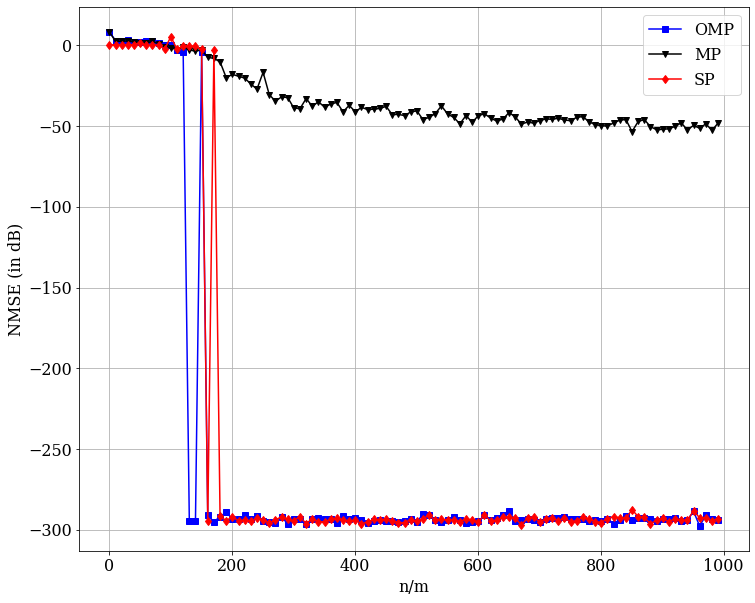

In [15]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "serif"
plt.plot(n_arr, np.mean(nmse_arr_OMP, axis=0), 'bs-',label='OMP')
plt.plot(n_arr, np.mean(nmse_arr_MP, axis=0), 'kv-',label='MP')
plt.plot(n_arr, np.mean(nmse_arr_SP, axis=0), 'rd-',label='SP')
plt.xlabel("n/m")
plt.ylabel("NMSE (in dB)")
plt.grid(True)
plt.legend()

## Observe the phase transition for ASCE

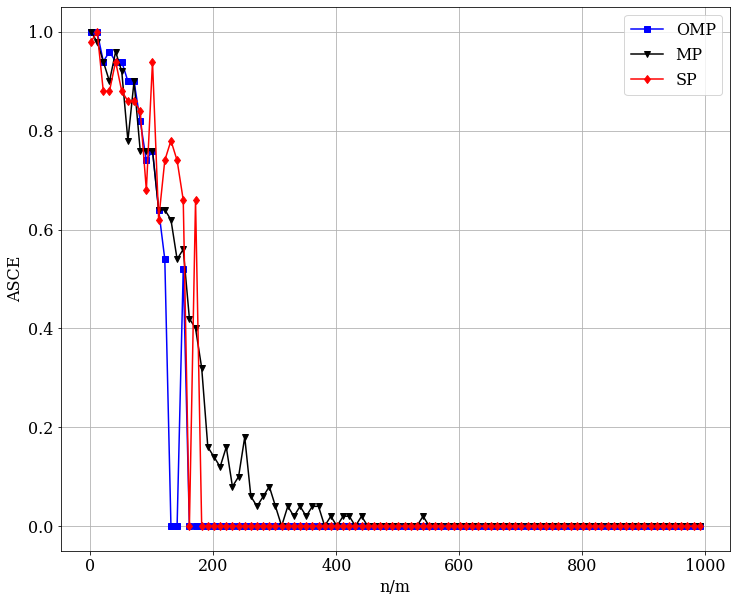

In [16]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "serif"
plt.plot(n_arr, np.mean(asce_arr_OMP,axis=0), 'bs-',label='OMP')
plt.plot(n_arr, np.mean(asce_arr_MP,axis=0), 'kv-',label='MP')
plt.plot(n_arr, np.mean(asce_arr_SP,axis=0), 'rd-',label='SP')
plt.xlabel("n/m")
plt.ylabel("ASCE")
plt.grid(True)
plt.legend()